In [2]:
using Plots
using LinearAlgebra

In [4]:
function lms(y, x, w, mu)
    yest = dot(w, x)
    e = y - yest
    w += 2mu * e * x
    return w, e, yest
end


lms (generic function with 1 method)

In [5]:

mu = 0.05
L = 6
NN = 200
err = zeros(NN)
w = zeros(Float64, L, NN + 1)
yest = zeros(NN)

# Assuming y, x, and htest are defined and populated
y = rand(NN)  # Replace with your actual data
x = rand(NN)  # Replace with your actual data
htest = rand(L)  # Replace with your actual data

for t in L:NN
    w[:, t + 1], err[t], yest[t] = lms(y[t], x[t:-1:t - L + 1], w[:, t], mu)
end

newhtest = zeros(L)
LL = min(length(htest), L)
newhtest[1:LL] .= htest[1:LL]


6-element view(::Vector{Float64}, 1:6) with eltype Float64:
 0.683740919035545
 0.4040796051520381
 0.8326573027750984
 0.4983210956460816
 0.3124829553358246
 0.8504194529818044

In [7]:

# Results
plot(1:NN, y[1:NN], label="Initial Noiseless Output")
plot!(1:NN, yest[1:NN], label="Estimated Output")
xlabel!("Time")
ylabel!("Output")
title!("Comparison of true output and estimated one after identification")

plot()
errh = [sum((newhtest - w[:, t]).^2) for t in 1:NN]
plot!(1:NN, errh, label="Quadratic error on h")
xlabel!("Time")
ylabel!("Error")
title!("Quadratic error between true and estimated filter")


LoadError: BoundsError: attempt to access 1-element Vector{Plots.Subplot} at index [2]

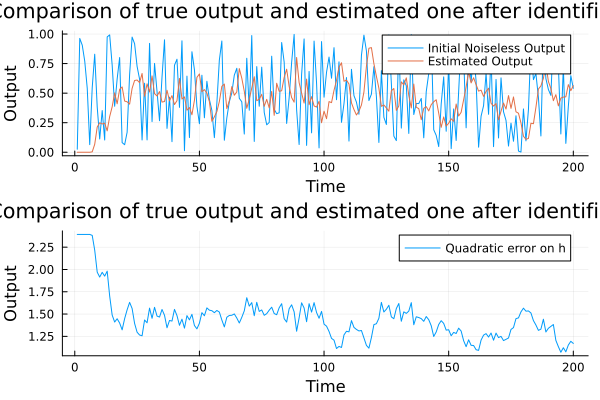

In [13]:
# Combined Plot
plot(layout = (2, 1)
    , xlabel = "Time", ylabel = "Output"
    , title = "Comparison of true output and estimated one after identification"
)

# Plot 1
plot!(1:NN, y[1:NN]
    , label="Initial Noiseless Output"
    , subplot = 1
)
plot!(1:NN, yest[1:NN]
    , label="Estimated Output"
    , subplot = 1
)

# Plot 2
errh = [sum((newhtest - w[:, t]).^2) for t in 1:NN]
plot!(1:NN, errh, label="Quadratic error on h", subplot = 2)
# xlabel!("Time")
# ylabel!("Error")
# title!("Quadratic error between true and estimated filter")